In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
trend = pd.read_csv("first_trend_df_1117.csv")
trend.head()

,Unnamed: 0,video_id,trending_date,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,...,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,top10Channel,top100Channel,top500Channel
0,0,-0CMnp02rNY,2018-06-06,TheEllenShow,24,475965,6531,172,271,https://i.ytimg.com/vi/-0CMnp02rNY/default.jpg,...,0,0,0,0,0,0,0,False,False,False
1,1,-0NYY8cqdiQ,2018-02-01,TheEllenShow,24,563746,4429,54,94,https://i.ytimg.com/vi/-0NYY8cqdiQ/default.jpg,...,0,0,0,0,0,0,0,False,False,False
2,2,-1Hm41N0dUs,2018-04-29,Jimmy Kimmel Live,23,1566807,32752,393,1490,https://i.ytimg.com/vi/-1Hm41N0dUs/default.jpg,...,0,0,0,0,0,0,0,False,False,False
3,3,-1yT-K3c6YI,2017-11-29,Molly Burke,22,129360,5214,108,516,https://i.ytimg.com/vi/-1yT-K3c6YI/default.jpg,...,0,1,0,0,0,0,0,False,False,False
4,4,-2RVw2_QyxQ,2017-11-14,Saint Louis Chess Club,27,67429,438,23,23,https://i.ytimg.com/vi/-2RVw2_QyxQ/default.jpg,...,0,0,0,0,0,0,0,False,False,False


In [2]:
trend.columns

Index(['Unnamed: 0', 'video_id', 'trending_date', 'channel_title',
       'category_id', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'publish_date', 'date_delta', 'd0', 'd1',
       'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12',
       'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22',
       'd23', 'd24', 'app_time', 'tags2', 'tagsLength', 'category',
       'Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Travel & Events', 'top10Channel', 'top100Channel', 'top500Channel'],
      dtype='object')

In [3]:
trend.shape

(6250, 63)

In [4]:
len(trend['video_id'].unique())

6250

In [5]:
X = trend
X = X.drop(['Unnamed: 0', 'video_id', 'trending_date', 'channel_title','category_id','thumbnail_link','publish_date','app_time','tags2','category'], axis = 1)
y = trend['app_time'] <= 1 ### 1 for only trending once within 31 days, 0 otherwise
X.head(1)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,date_delta,d0,d1,...,Nonprofits & Activism,People & Blogs,Pets & Animals,Science & Technology,Shows,Sports,Travel & Events,top10Channel,top100Channel,top500Channel
0,475965,6531,172,271,False,False,False,2,-0.161175,0.124738,...,0,0,0,0,0,0,0,False,False,False


In [6]:
def get_ROCplot(fpr,tpr,roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

## Baseline LogisticRegression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
lgr = LogisticRegression()
lgr.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

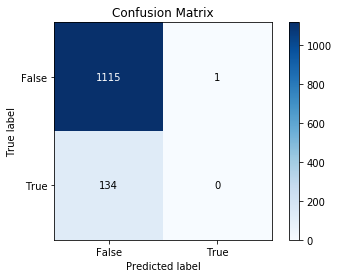

In [8]:
y_pred = lgr.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [9]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

1115 1 134 0


In [10]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fp_rate = fp / (fp + tn)
f1_score = 2 * (precision * recall / (precision + recall))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("recall:", recall, "\n precision:", precision, "\n fp_rate:",fp_rate, "\n f1_score:",f1_score, "\n accuracy:",accuracy)

recall: 0.0 
 precision: 0.0 
 fp_rate: 0.0008960573476702509 
 f1_score: nan 
 accuracy: 0.892


/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


Area under the ROC curve : 0.557903


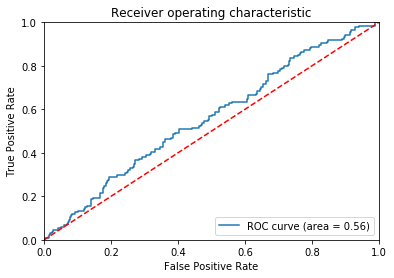

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lgr.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

## Tuned LogisticRegression using recall

In [12]:
from sklearn.model_selection import GridSearchCV
parameters = {'C' :[0.005,0.05, 0.15, 0.1,0.2,0.3,0.4,0.5,0.7,0.9,1]}
des = LogisticRegression()
clf = GridSearchCV(des, parameters,scoring='recall')
clf.fit(X, y)
clf.best_score_

0.0

In [13]:
clf.best_params_

{'C': 0.005}

In [14]:
des = LogisticRegression(C = 0.005)
des.fit(X_train, y_train)

LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

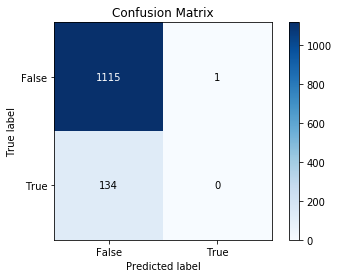

In [15]:
y_pred = des.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Area under the ROC curve : 0.550754


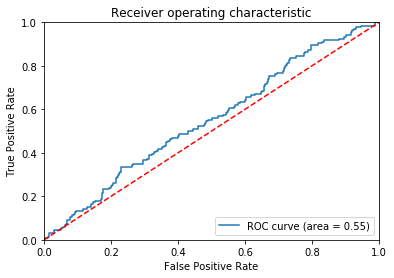

In [16]:
logit_roc_auc = roc_auc_score(y_test, des.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, des.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

Linear decision boundary is not a good fit

## Baseline RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

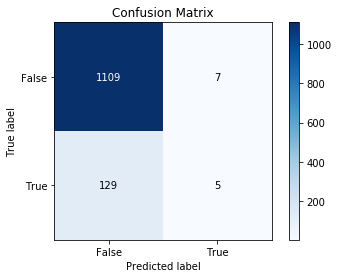

In [18]:
y_pred = clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Area under the ROC curve : 0.737699


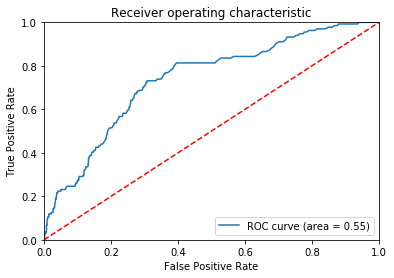

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
tree_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % tree_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

1109 7 129 5


In [21]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fp_rate = fp / (fp + tn)
f1_score = 2 * (precision * recall / (precision + recall))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("recall:", recall, "\n precision:", precision, "\n fp_rate:",fp_rate, "\n f1_score:",f1_score, "\n accuracy:",accuracy)

recall: 0.03731343283582089 
 precision: 0.4166666666666667 
 fp_rate: 0.0062724014336917565 
 f1_score: 0.0684931506849315 
 accuracy: 0.8912


## Tuned RandomForest using recall

In [30]:
parameters = {'n_estimators' : range(1,20),'max_depth' : range(1,20)}
des = RandomForestClassifier(random_state=0,bootstrap=True,max_features='auto')
clf = GridSearchCV(des, parameters,scoring='recall')
clf.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(1, 20), 'max_depth': range(1, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [31]:
clf.best_params_

{'max_depth': 19, 'n_estimators': 1}

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
des = RandomForestClassifier(max_depth=19, n_estimators= 1,random_state=0,bootstrap=True,max_features='auto')
des.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=19, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

Feature ranking:
1 comment_count 0.06611917085497118
2 d23 0.05731533929750991
3 d4 0.04948095311274193
4 d24 0.044912328498335215
5 d15 0.043735043705058076
6 d6 0.04328029891038567
7 d0 0.043054951634639106
8 d16 0.040697434728479316
9 likes 0.03978439322593971
10 d11 0.036892864692190136
11 tagsLength 0.036302235014256584
12 date_delta 0.03378478798593533
13 dislikes 0.03359315447011079
14 views 0.031819619056192225
15 d21 0.030737057818459024
16 d14 0.029251005179766486
17 d7 0.02484961166683835
18 d19 0.024472504097941963
19 d5 0.024408591043249165
20 d20 0.02419189529281206
21 d1 0.023864823371782768
22 d10 0.02193855519052022
23 d3 0.021906393660246718
24 d2 0.02148619589016297
25 d22 0.020256212436039575
26 d13 0.01992803988803227
27 d8 0.018871434604071542
28 d17 0.01590299254579104
29 d18 0.015414262410899856
30 d12 0.011874519723386786
31 d9 0.01071007660079965
32 Entertainment 0.007275056385479444
33 Sports 0.006505763571528334
34 Music 0.00645276348240402
35 Comedy 0.00623

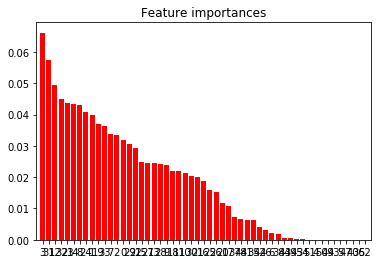

In [33]:
import numpy as np
importances = des.feature_importances_
std = np.std([des.feature_importances_ for tree in des.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{0} {1} {2}".format(f + 1, X.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

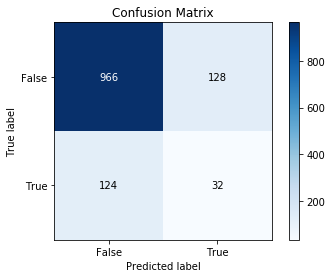

In [34]:
y_pred = des.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

Area under the ROC curve : 0.840353


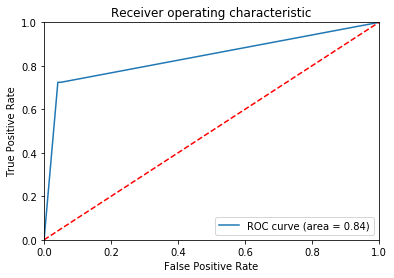

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])
print("Area under the ROC curve : %f" % logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
get_ROCplot(fpr,tpr,logit_roc_auc)

In [36]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

966 128 124 32


In [37]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fp_rate = fp / (fp + tn)
f1_score = 2 * (precision * recall / (precision + recall))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("recall:", recall, "\n precision:", precision, "\n fp_rate:",fp_rate, "\n f1_score:",f1_score, "\n accuracy:",accuracy)

recall: 0.20512820512820512 
 precision: 0.2 
 fp_rate: 0.1170018281535649 
 f1_score: 0.20253164556962025 
 accuracy: 0.7984


## Xgboost Classification

In [43]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

params = {'n_estimators': [10, 20, 50, 100], 'min_child_weight': [1, 3, 5],
         'max_depth':[3, 5, 7], 'gamma': [(0.5*i) for i in range(5)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, subsample=0.8, colsample_bytree=0.8, 
                                                 early_stopping_round=100, objective= 'binary:logistic', 
                                                nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = params, scoring='roc_auc',n_jobs=1,iid=False, cv=5)
gsearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, early_stopping_round=100, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'min_child_weight': [1, 3, 5], 'max_depth': [3, 5, 7], 'gamma': [0.0, 0.5, 1.0, 1.5, 2.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [44]:
print(gsearch.best_score_)
print(gsearch.best_params_)

0.7554239470197665
{'gamma': 1.5, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 50}


In [47]:
xgb = XGBClassifier(learning_rate =0.1, n_estimators=50, max_subsample=0.8, colsample_bytree=0.8,
                                                 max_depth=7, min_child_weight=3, early_stopping_round=50,
                     objective= 'binary:logistic', gamma=1.5, nthread=4, scale_pos_weight=1, seed=27)

In [48]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, early_stopping_round=50, gamma=1.5,
       learning_rate=0.1, max_delta_step=0, max_depth=7, max_subsample=0.8,
       min_child_weight=3, missing=None, n_estimators=50, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=True, subsample=1)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


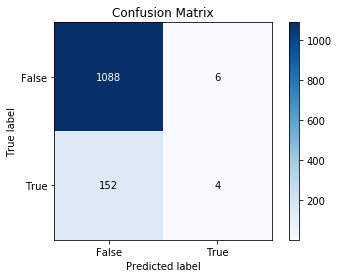

In [49]:
y_pred = xgb.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)

1088 6 152 4


In [51]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
fp_rate = fp / (fp + tn)
f1_score = 2 * (precision * recall / (precision + recall))
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("recall:", recall, "\n precision:", precision, "\n fp_rate:",fp_rate, "\n f1_score:",f1_score, "\n accuracy:",accuracy)

recall: 0.02564102564102564 
 precision: 0.4 
 fp_rate: 0.005484460694698354 
 f1_score: 0.048192771084337345 
 accuracy: 0.8736
